### 导入dlib和opencv

In [1]:
import dlib
import cv2
from utils import rect_contains, draw_point, draw_delaunay, draw_voronoi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 定义特征点的颜色和delaunay三角的颜色

In [2]:
delaunay_color = (255, 255, 255)
points_color = (255, 0, 0)
img = cv2.imread('./1.jpg')

### 建立dlib面部识别器，并load权重

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [4]:
dets = detector(img, 1)

### 得到检测的特征点

In [5]:
point = []
for k, d in enumerate(dets):
    print('Detection {}: left: {} Top: {} Right: {} Bottom: {}'.format(
    k, d.left(), d.top(), d.right(), d.bottom()))
    shape = predictor(img, d)
    for keypoint in shape.parts():
        point.append((keypoint.x, keypoint.y))

Detection 0: left: 161 Top: 119 Right: 546 Bottom: 504


### 画出特征点

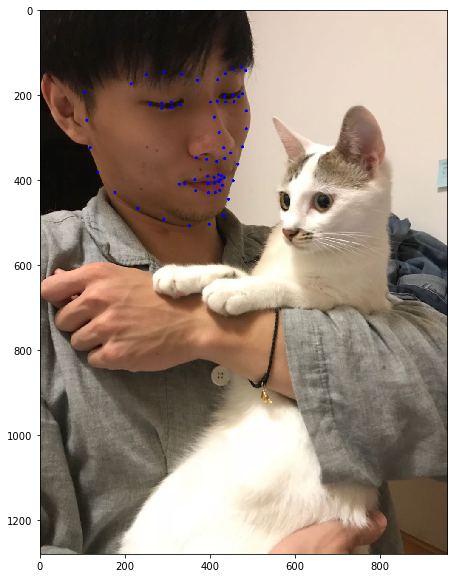

In [6]:
img_copy = img.copy()
for p in point:
    draw_point(img_copy, p, points_color)
plt.figure(figsize=(10, 10))
plt.imshow(img_copy[:, :, ::-1])
plt.show()

In [7]:
size = img.shape

In [8]:
rect = (0, 0, size[1], size[0])

In [9]:
subdiv = cv2.Subdiv2D(rect)

### 画出delaunay三角形

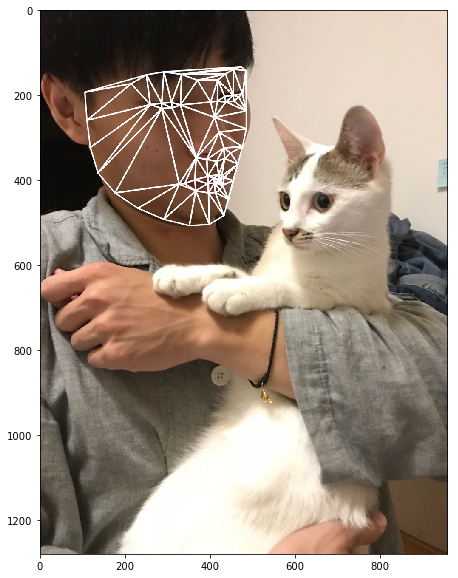

In [10]:
for p in point:
    subdiv.insert(p)
img_copy = img.copy()
draw_delaunay(img_copy, subdiv, delaunay_color)
plt.figure(figsize=(20, 10))
plt.imshow(img_copy[:, :, ::-1])

### 画出voronoi多边形

In [11]:
img_voronoi = np.zeros(img.shape, dtype=img.dtype)

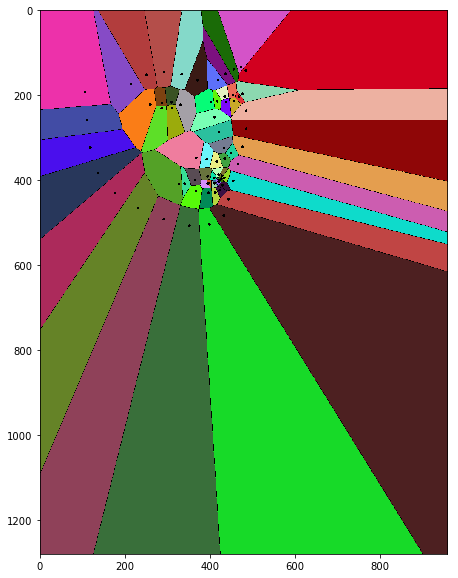

In [12]:
draw_voronoi(img_voronoi, subdiv)
plt.figure(figsize=(20, 10))
plt.imshow(img_voronoi)